# Quantum Ensemble as Simple Averaging (Section 4.3)
## Fixed $U_{(i,j)}$ for independent trajectories

This notebook shows in details that the Quantum Ensemble algorithm is able to reproduce the average of multiple cosine classifiers with just one implementation of the quantum cosine classifier.

Import pakages and functions

In [1]:
%matplotlib inline

import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

## Technical details of Quantum Ensemble of the cosine classifiers

We build the ensemble of the four quantum cosine classifiers. In particular we set $d=2$ so that the ensemble size is equal to $B=2^2$. The data register is composed by $8$ qubits ($4$ contains the normalised value of the trainin vectors encoded in the amplitud, other four are for the labels, in particular quantum state $ \left| 0 \right\rangle $ for class $0$ and state $ \left| 1 \right\rangle$ for class $1$.

Since we build an ensemble of $4$ classifiers we need $2 \times d$ of  $U_{(i,j)}$ gates, each of them corresponds to two swap operations:

### Step 1: State Preparation

$$ 
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
$$
$$
\begin{align*}
    \ket{\Phi_1} = & \big(W \otimes S_{(x,y)}\big)\ket{\Phi_0} = \big( H^{\otimes 2} \otimes S_{(x,y)} \big) \ket{0} \otimes \ket{0} \otimes \ket{0} \nonumber \\ 
        = &
    \ket{c_1} \otimes \ket{c_2} \otimes \ket{x;y} \nonumber\\
    = & 
    \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big) \otimes \frac{1}{\sqrt{2}}\big(\ket{0}+\ket{1}\big) \otimes \ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3} \nonumber \\
%    = &   \ket{c_1} \otimes \ket{c_2} \overset{4}{\underset{i=1}{\otimes}}\ket{x_b} \overset{4}{\underset{i=1}{\otimes}}\ket{y_b}
\end{align*}
$$

where $S_x$ is the routine which encodes in the amplitudes of a qubit a real vector $x$ and $H$ is the Hadamard transformation.

### Step 2: Sampling in Superposition

As shown in the Appendix of the paper, *Sampling in Superposition* step leads to the following quantum state:
$$
\begin{align}
\ket{\Phi_{3}}
=  \frac{1}{2}\Big[
 \hspace{.2em} &\ket{00} U_{(2,1)}U_{(1,1)}\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3}    
\nonumber \\ + & 
\ket{01} U_{(2,1)}U_{(1,2)}\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3}
\nonumber \\ + & 
\ket{10} U_{(2,2)}U_{(1,1)}\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3}
\nonumber \\ + & 
\ket{11} U_{(2,2)}U_{(1,2)}\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3} 
         \Big]  
     %\nonumber \\
 %& \hspace{-2.75em} = \frac{1}{\sqrt{4}} \sum_{b=1}^{4} \ket{b} V_b\ket{x_0,x_1,x_2,x_3; y_0,y_1,y_2,y_3}
\end{align}
$$

Thus, given the following definition for  
$$U_{(1,1)} = \text{swap}(x_0,x_2) \times \text{swap}(y_0,y_2)$$
$$U_{(1,2)} = \text{swap}(x_1,x_3) \times \text{swap}(y_1,y_3)$$
$$U_{(2,1)} = \mathbf{I} $$
$$U_{(2,2)} = \text{swap}(x_2,x_3) \times \text{swap}(y_2,y_3)$$

where $ \mathbf{I}$ is the identity matrix. If considering the last qubit of the data register, this choice of $U_{(i,j)}$ guarantees that each quantum of the control register is entangled with a different point of data.

\begin{align}
    \ket{\Phi_{3}} = & \frac{1}{2}\Big[ 
    \ket{11}\ket{x_0, x_3, x_1, x_2} \ket{y_0, y_3, y_1, y_2}  
    + \ket{10}\ket{x_2, x_1, x_3, x_0} \ket{y_2, y_1, y_3, y_0}+ \nonumber\\ 
        & \hspace{.1em} 
    +\ket{01}\ket{x_0, x_3, x_2, x_1} \ket{y_0, y_3, y_2, y_1} +\ket{00} \ket{x_2, x_1, x_0, x_3} \ket{y_2, y_1, y_0, y_3} \Big]
\end{align}

\begin{align}
    \ket{\Phi_{3}} = & \frac{1}{2}\Big[ 
    \ket{11}\ket{x_2} \ket{y_2}  
    + \ket{10}\ket{x_0}\ket{y_0} +\ket{01}\ket{x_1}\ket{y_1} +\ket{00}\ket{x_3} \ket{y_3} \Big] =
    \frac{1}{2}\sum_{i=0}^{3}\ket{i}\ket{x_i}\ket{y_i}
\end{align}

\begin{align}
    \ket{\Phi_{f}} 
                & = \Big(\mathbb{1}^{\otimes 2} \otimes F \Big) \ket{\Phi_d} = (\mathbb{1}^{\otimes 2} \otimes F )\Big[\frac{1}{\sqrt{2^d}}\sum_{i=1}^{2^d} \ket{i} \ket{x_i}\ket{y_i}\ket{\tilde{x}}\ket{0}\Big] = \frac{1}{\sqrt{2^2}}\sum_{i=0}^{2^2-1} \ket{i} \ket{x_i, y_i} \ket{\tilde{x}} \ket{f_i} 
    %CV_{t}\ket{\psi} = CV_{t}\ket{x, y}\ket{0} \ket{\Tilde{x}, 0} = C \ket{x, y}\ket{x_t, x_y} \ket{\Tilde{x}, 0} = \ket{x, y}\ket{x_t, x_t} \ket{\Tilde{x}, \tilde{y}} %= \ket{x, y, D_t, \Tilde{x}, f(\Tilde{x}|x_t,y_t)} 
\end{align}

## Implementation

In [2]:
d = 2
n_obs = 4
control = QuantumRegister(d, 'd')
data = QuantumRegister(n_obs, 'x')
labels = QuantumRegister(n_obs, 'y')
data_test = QuantumRegister(1, 'x^{test}')
label_test = QuantumRegister(1, 'y^{test}')
c = ClassicalRegister(1, 'c')

qc = QuantumCircuit(control, data, labels, data_test, label_test, c)


S = Gate(name='   S   ', num_qubits=8, params=[])
qc.append(S, [data[0], data[1], data[2], data[3],
              labels[0], labels[1], labels[2], labels[3]])


# for i in range(d):
#     qc.h(control[i])

W = Gate(name='   W   ', num_qubits=2, params=[])
qc.append(W, [control[0], control[1]])


U1 = [0, 2]
U2 = [1, 3]  
U4 = [2,3]  

qc.barrier()

# U1
qc.cswap(control[0], data[int(U1[0])], data[int(U1[1])])
qc.cswap(control[0], labels[int(U1[0])], labels[int(U1[1])])

qc.x(control[0])

# U2
qc.cswap(control[0], data[int(U2[0])], data[int(U2[1])])
qc.cswap(control[0], labels[int(U2[0])], labels[int(U2[1])])

qc.barrier()

# U3

qc.x(control[1])

# U4
qc.cswap(control[1], data[int(U4[0])], data[int(U4[1])])
qc.cswap(control[1], labels[int(U4[0])], labels[int(U4[1])])

qc.barrier()
#qc.initialize(x_test, [data_test[0]])
S_test = Gate(name='$S_{(test)}$', num_qubits=2, params=[])
qc.append(S_test, [data_test, label_test])

qc.barrier()

# F
ix_cls = 3


qc.h(label_test[0])
qc.cswap(label_test[0], data[ix_cls], data_test[0])
qc.h(label_test[0])
qc.cx(labels[ix_cls], label_test[0])
qc.measure(label_test[0], c)

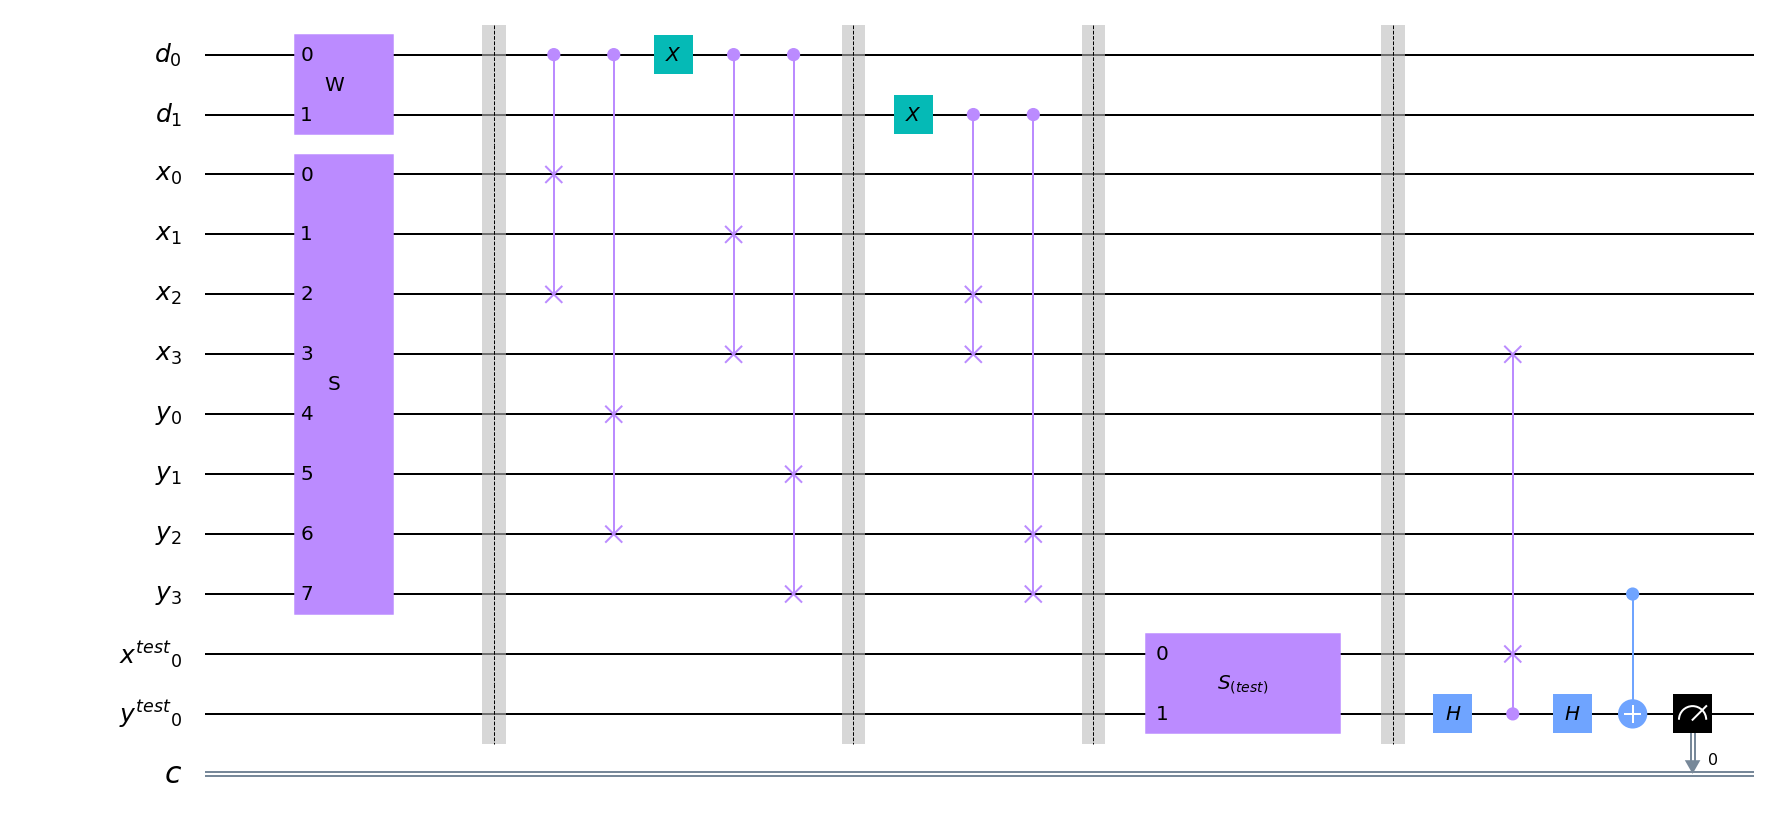

In [3]:
qc.draw(output='mpl', scale=.6, filename='output/ensemble_circuit.png', style={'fontsize':20, 'dpi':300}, vertical_compression='high')

## Experiments

In [2]:
seed = 543
print('seed:', seed)

n_shots = 8192
N_runs = 20
y_labels =[[0,1], [1,0]]

seed: 543


In [5]:
p1_avg = []
p1_ens = []

np.random.seed(seed)
for run in np.arange(N_runs):
    # print(run)
    x1 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x2 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x3 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    x4 = [np.random.randint(1, 9), np.random.randint(1, 9)]
    
    y1 = y_labels[np.random.randint(0, 2)]
    y2 = y_labels[np.random.randint(0, 2)]
    y3 = y_labels[np.random.randint(0, 2)]
    y4 = y_labels[np.random.randint(0, 2)]
    
    Y_data = [y1, y2, y3, y4]  
    X_data = [x1, x2, x3, x4]
    
    x_test = [np.random.randint(1, 9), np.random.randint(1, 9)]

    X_data, Y_data, x_test = load_data_custom(X_data, Y_data, x_test = x_test)

    qc1 = quantum_cosine_classifier(X_data[0], x_test, Y_data[0] )
    r1 = exec_simulator(qc1)
    r1 = retrieve_proba(r1)

    qc2 = quantum_cosine_classifier(X_data[1], x_test, Y_data[1])
    r2 = exec_simulator(qc2)
    r2 = retrieve_proba(r2)

    qc3 = quantum_cosine_classifier(X_data[2], x_test, Y_data[2])
    r3 = exec_simulator(qc3)
    r3 = retrieve_proba(r3)

    qc4 = quantum_cosine_classifier(X_data[3], x_test, Y_data[3])
    r4 = exec_simulator(qc4)
    r4 = retrieve_proba(r4)
     
    out = [r1, r2, r3, r4]

    p0 = [p[0] for p in out]
    p1 = [p[1] for p in out]
    
    r_avg = [np.mean(p0), np.mean(p1)]
    # print('AVG:', r_avg)

    
    qc = ensemble_fixed_U(X_data, Y_data, x_test)
    qc = transpile(qc, basis_gates = ['u1', 'u2', 'u3', 'cx'], optimization_level=3)

    r = exec_simulator(qc, n_shots=n_shots)
    r_ens = retrieve_proba(r)
    # print('Ensemble', r_ens)

    out = [r1, r2, r3, r4, r_avg, r_ens]
    
    p1_avg.append(r_avg[1])
    p1_ens.append(r_ens[1])

In [6]:
def avg_vs_ensemble(avg, ens, ens_real=None):
    if ens_real!=None:
        plt.plot(np.arange(N_runs), p1_ens_real, marker='o', color='lightblue', label='Ensemble (RL)')
    plt.plot(np.arange(N_runs), p1_ens, marker='o', color='orange', label = 'Ensemble (QASM)')
    plt.scatter(np.arange(N_runs), p1_avg, label='Simple AVG', color='sienna', zorder=3, linewidth=.5)
    plt.title('Quantum Ensemble vs Simple Average', size=12).set_position([.5, 1.05])
    plt.xlabel('runs', size=12)
    plt.ylabel(r'$P(\tilde{y}=1)$', size =12)
    plt.xticks(np.arange(0, N_runs+1, 5), size = 12)
    plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], size = 12)
    plt.ylim(0,1)
    plt.grid(alpha=.3)
    plt.legend()
    #plt.savefig('output/multi_run_fixed.png', dpi = 300)

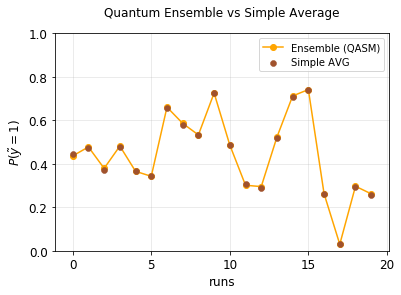